# CLASSIFICATION USING KNN MODEL

Imagine a telecommunications provider has segmented its customer base by service usage patterns, categorizing the customers into four groups. If demographic data can be used to predict group membership, the company can customize offers for individual prospective customers. It is a classification problem. That is, given the dataset, with predefined labels, we need to build a model to be used to predict class of a new or unknown case.

The example focuses on using demographic data, such as region, age, and marital, to predict usage patterns.

The target field, called custcat, has four possible values that correspond to the four customer groups, as follows: 1- Basic Service 2- E-Service 3- Plus Service 4- Total Service

Our objective is to build a classifier, to predict the class of unknown cases. We will use a specific type of classification called K nearest neighbour.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
sns.set() 

In [2]:
data = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/teleCust1000t.csv")
df = data.copy()
df.head()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
0,2,13,44,1,9,64.0,4,5,0.0,0,2,1
1,3,11,33,1,7,136.0,5,5,0.0,0,6,4
2,3,68,52,1,24,116.0,1,29,0.0,1,2,3
3,2,33,33,0,12,33.0,2,0,0.0,1,1,1
4,2,23,30,1,9,30.0,1,2,0.0,0,4,3


## Data analysis

In [3]:
df.shape 


(1000, 12)

In [4]:
df.dtypes

region       int64
tenure       int64
age          int64
marital      int64
address      int64
income     float64
ed           int64
employ       int64
retire     float64
gender       int64
reside       int64
custcat      int64
dtype: object

In [7]:
columns = df.columns
print(columns)

Index(['region', 'tenure', 'age', 'marital', 'address', 'income', 'ed',
       'employ', 'retire', 'gender', 'reside', 'custcat'],
      dtype='object')


In [10]:
missing_values = df.isnull()
missing_values.head()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False


In [13]:
for column in columns:
    print(missing_values[column].value_counts())
    

region
False    1000
Name: count, dtype: int64
tenure
False    1000
Name: count, dtype: int64
age
False    1000
Name: count, dtype: int64
marital
False    1000
Name: count, dtype: int64
address
False    1000
Name: count, dtype: int64
income
False    1000
Name: count, dtype: int64
ed
False    1000
Name: count, dtype: int64
employ
False    1000
Name: count, dtype: int64
retire
False    1000
Name: count, dtype: int64
gender
False    1000
Name: count, dtype: int64
reside
False    1000
Name: count, dtype: int64
custcat
False    1000
Name: count, dtype: int64


From the above we can conclude that there are no missing values in the dataset provided

In [17]:
categories = df['custcat'].value_counts()
categories

custcat
3    281
1    266
4    236
2    217
Name: count, dtype: int64

we can conclude from the above that the dataset is quite not biased and can be visualised as below

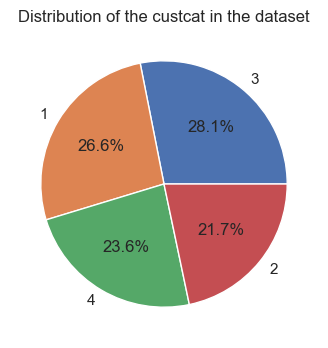

In [35]:
plt.figure(figsize=(7,4))
plt.pie(categories, labels = categories.index,autopct='%1.1f%%')
plt.title('Distribution of the custcat in the dataset')
plt.show()

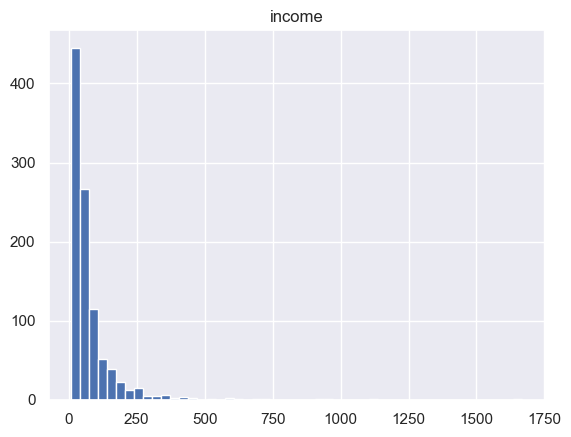

In [45]:
df.hist('income',bins = 50)
plt.show()

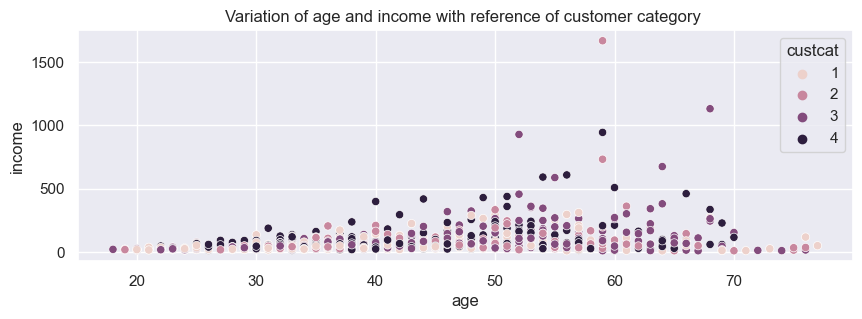

In [134]:
plt.figure(figsize=(10,3))
sns.scatterplot(x ='age',y='income',data = df,hue = 'custcat')
plt.title('Variation of age and income with reference of customer category ')
plt.show()

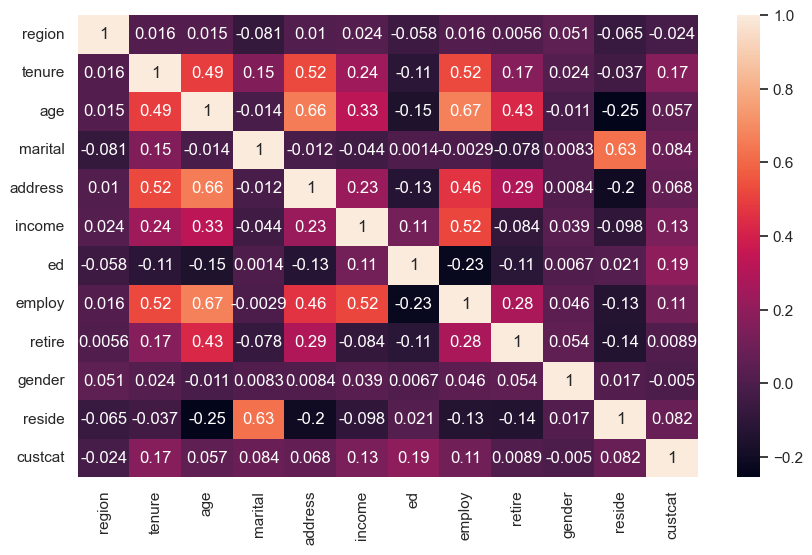

In [144]:
correlation = df.corr()
plt.figure(figsize=(10,6))
sns.heatmap(correlation,annot = True,)
plt.show()

### feature selection

In [55]:
x = df[['region', 'tenure', 'age', 'marital', 'address', 'income', 'ed',
       'employ', 'retire', 'gender', 'reside']].values

In [59]:
y = df['custcat'].values

In [60]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y, random_state = 5,test_size = 0.2)


In [63]:
print ('Train set:', x_train.shape,  y_train.shape)
print ('Test set:', x_test.shape,  y_test.shape)

Train set: (800, 11) (800,)
Test set: (200, 11) (200,)


### Train Data normalisation

In [65]:
from sklearn.preprocessing import StandardScaler 
sc = StandardScaler()
x_train = sc.fit_transform(x_train)

## Model Building

In [119]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors = 7)
model.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=7)

Predicting

In [120]:
x_test = sc.fit_transform(x_test)

y_pred = model.predict(x_test)
y_pred

array([2, 3, 2, 3, 1, 1, 1, 4, 1, 1, 2, 4, 2, 3, 3, 1, 3, 1, 1, 2, 3, 3,
       1, 4, 2, 4, 4, 3, 1, 3, 4, 3, 1, 2, 3, 2, 1, 1, 1, 1, 4, 4, 2, 3,
       3, 4, 2, 1, 1, 3, 3, 1, 2, 2, 1, 1, 2, 1, 1, 1, 2, 2, 3, 3, 2, 4,
       4, 1, 1, 2, 1, 2, 3, 1, 1, 3, 1, 2, 4, 4, 2, 3, 3, 4, 2, 4, 2, 2,
       2, 4, 1, 1, 4, 3, 3, 3, 4, 1, 3, 1, 2, 2, 1, 3, 4, 4, 4, 3, 4, 4,
       2, 2, 4, 2, 1, 2, 4, 2, 1, 1, 3, 3, 3, 3, 2, 3, 2, 4, 4, 1, 1, 1,
       4, 1, 2, 3, 1, 1, 2, 1, 3, 4, 3, 4, 4, 4, 1, 2, 1, 2, 2, 2, 1, 1,
       3, 2, 2, 1, 1, 3, 3, 3, 3, 4, 4, 3, 3, 3, 3, 1, 3, 1, 1, 3, 1, 4,
       1, 2, 1, 2, 1, 3, 2, 2, 1, 4, 4, 1, 1, 1, 3, 2, 4, 3, 3, 4, 2, 1,
       3, 2])

In [121]:
dataframe = {
    'y_norm':y_test,
    'y_pred':y_pred,
}

dataf = pd.DataFrame(dataframe)

In [122]:
dataf.head(20)

,y_norm,y_pred
0,3,2
1,4,3
2,3,2
3,3,3
4,1,1
5,1,1
6,1,1
7,1,4
8,1,1
9,1,1


In [123]:
from sklearn.metrics import confusion_matrix,f1_score
conf_matrix = confusion_matrix(y_test, y_pred)

print(conf_matrix)


[[23 11 10  9]
 [11 13  8 13]
 [17 13 24  6]
 [11 11  9 11]]


## Determination of appropiate number of neighbours to use 

In [124]:
from sklearn.metrics import  accuracy_score
Ks = 20
acc_list = []

for n in range(1,Ks): 
    #Train Model and Predict  
    model = KNeighborsClassifier(n_neighbors = n).fit(x_train,y_train)
    y_pred=model.predict(x_test)
    acc_list.append(accuracy_score(y_test, y_pred))

acc_list
# std_acc 

[0.29,
 0.29,
 0.28,
 0.315,
 0.34,
 0.31,
 0.355,
 0.315,
 0.33,
 0.305,
 0.29,
 0.3,
 0.305,
 0.27,
 0.31,
 0.32,
 0.295,
 0.31,
 0.305]

In [125]:
k = list(np.arange(1,Ks))

In [126]:
dfa = {
    'K_neighbours':k,
    'Accuracy':acc_list,
}

df2 = pd.DataFrame(dfa)

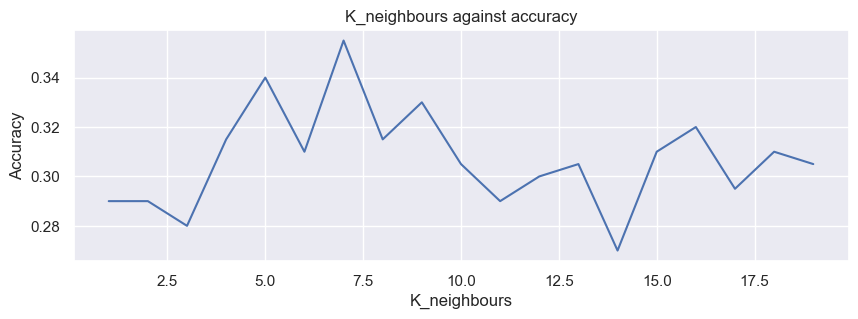

In [127]:
plt.figure(figsize =(10,3))
sns.lineplot(x='K_neighbours',y = 'Accuracy',data= df2)
plt.title('K_neighbours against accuracy')
plt.show()

from the above, we can see that the appropriate number of neighbours to use is 7 since it yields the biggest accuracy 